In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data display coustomization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [4]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [5]:
# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Data Preparation

## Data Loading

In [6]:
mall= pd.read_csv("Mall_Customers.csv")
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall.shape

(200, 5)

In [8]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Duplicate Check

In [10]:
mall_d= mall.copy()
mall_d.drop_duplicates(subset=None,inplace=True)

In [11]:
mall_d.shape

(200, 5)

In [12]:
mall.shape

(200, 5)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

# Data Cleaning

Null Percentage: Columns

In [13]:
(mall.isnull().sum() * 100 / len(mall)).value_counts(ascending=False)

0.0    5
dtype: int64

Null Count: Columns

In [14]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Null Percentage: Rows

In [15]:
(mall.isnull().sum(axis=1) * 100 / len(mall)).value_counts(ascending=False)

0.0    200
dtype: int64

Null Count: Rows

In [16]:
mall.isnull().sum(axis=1).value_counts(ascending=False)

0    200
dtype: int64

There are no missing / Null values either in columns or rows

# Exploratory Data Analytics

Univariate Analysis

**Gender**

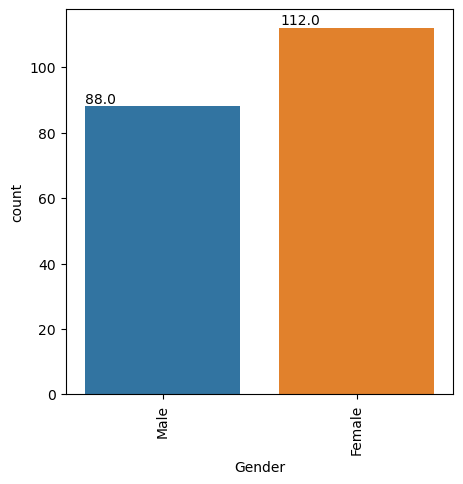

In [17]:
plt.figure(figsize = (5,5))
gender = mall['Gender'].sort_values(ascending = False)
ax = sns.countplot(x='Gender', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=90)
plt.show()

Data is not balanced, 6% more Females have participated  than males 

**Age**

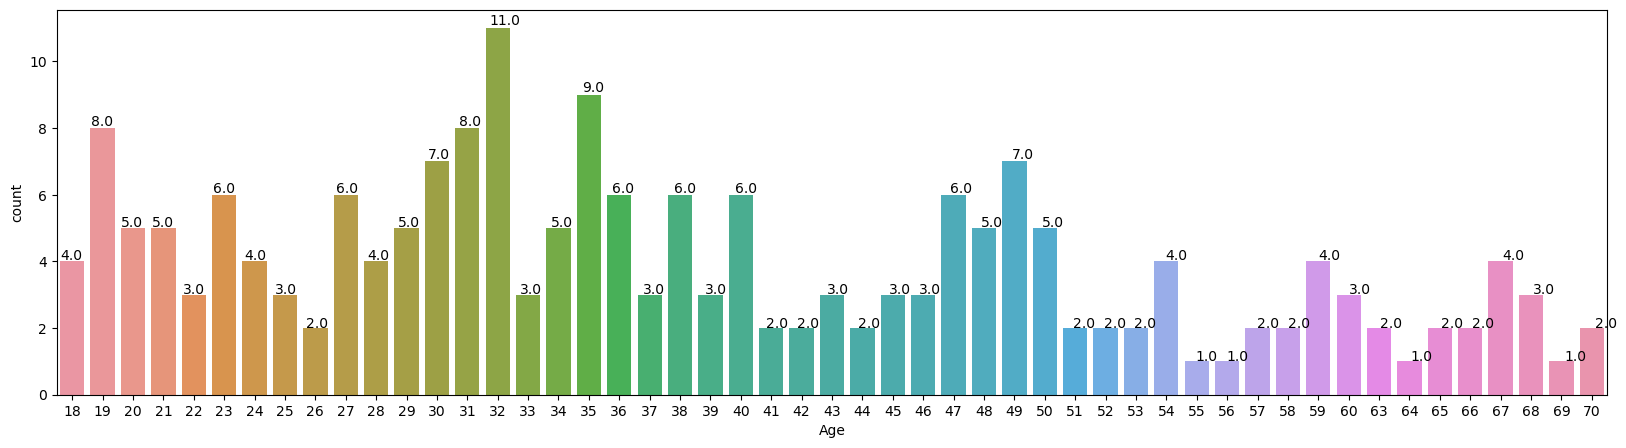

In [18]:
 
plt.figure(figsize = (20,5))
gender = mall['Age'].sort_values(ascending = False)
ax = sns.countplot(x='Age', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

Audience are from Age 18 to 70

**Annual Income (k$)**

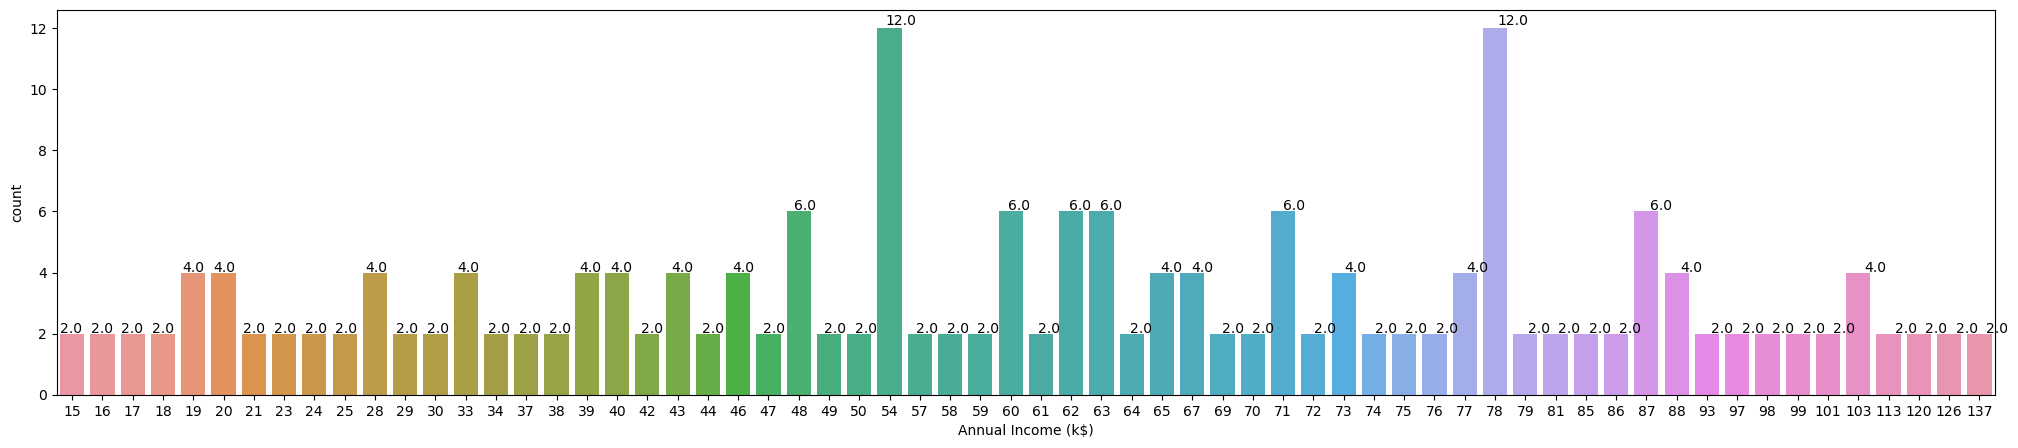

In [19]:
plt.figure(figsize = (25,5))
gender = mall['Annual Income (k$)'].sort_values(ascending = False)
ax = sns.countplot(x='Annual Income (k$)', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

Audience are from Annual Income(k$) range between 15 to 137

**Spending Score (1-100)**

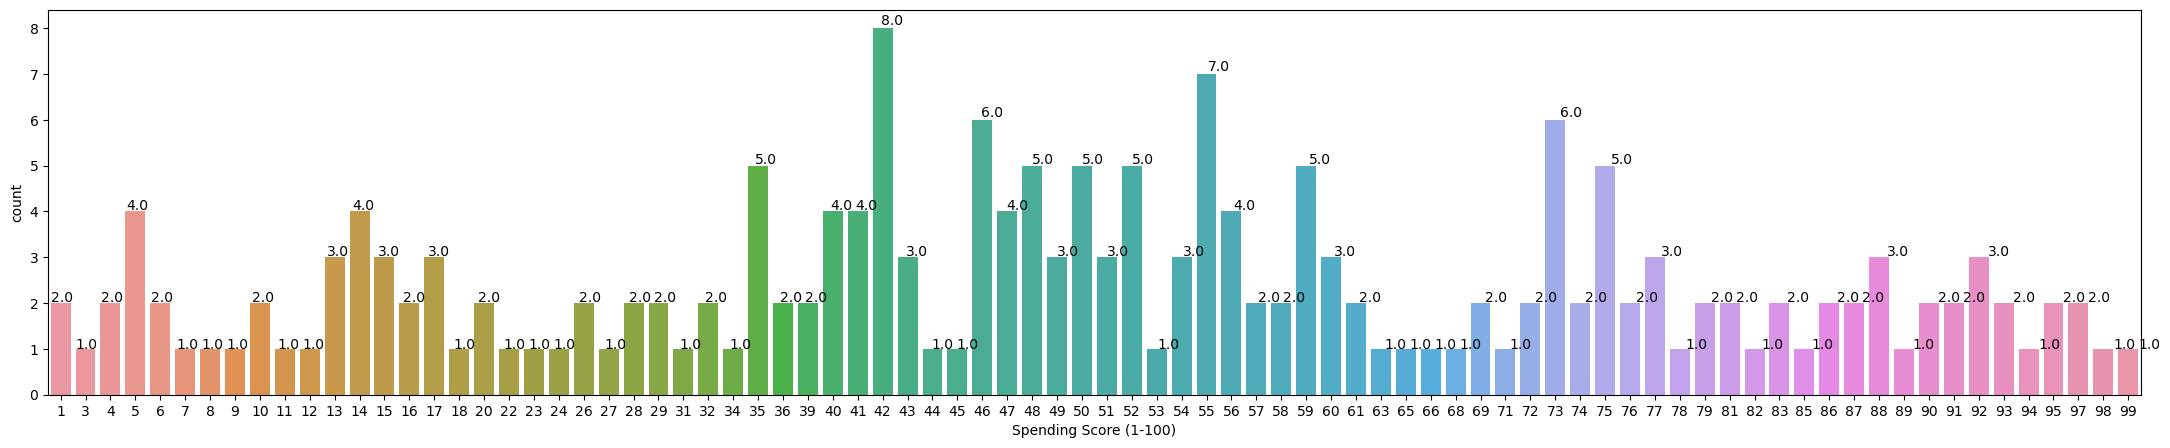

In [20]:
plt.figure(figsize = (27,5))
gender = mall['Spending Score (1-100)'].sort_values(ascending = False)
ax = sns.countplot(x='Spending Score (1-100)', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

Audience are having Spending Score (1-100) between 1 to 99 

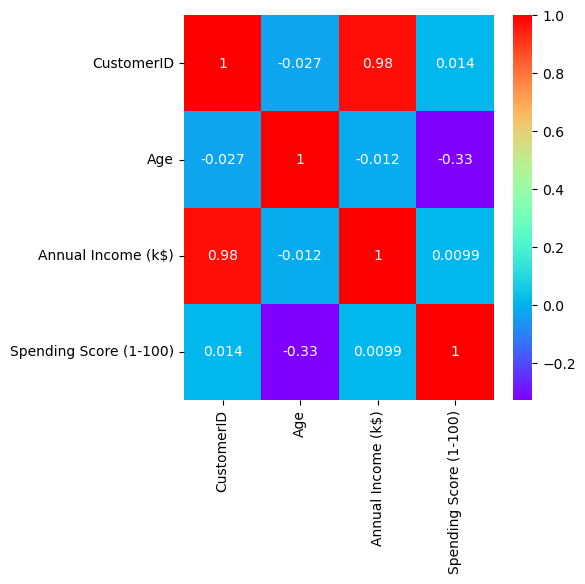

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (5,5))
sns.heatmap(mall.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

- Age and Spending Score (1-100) are moderately correlated with correlation of -0.33

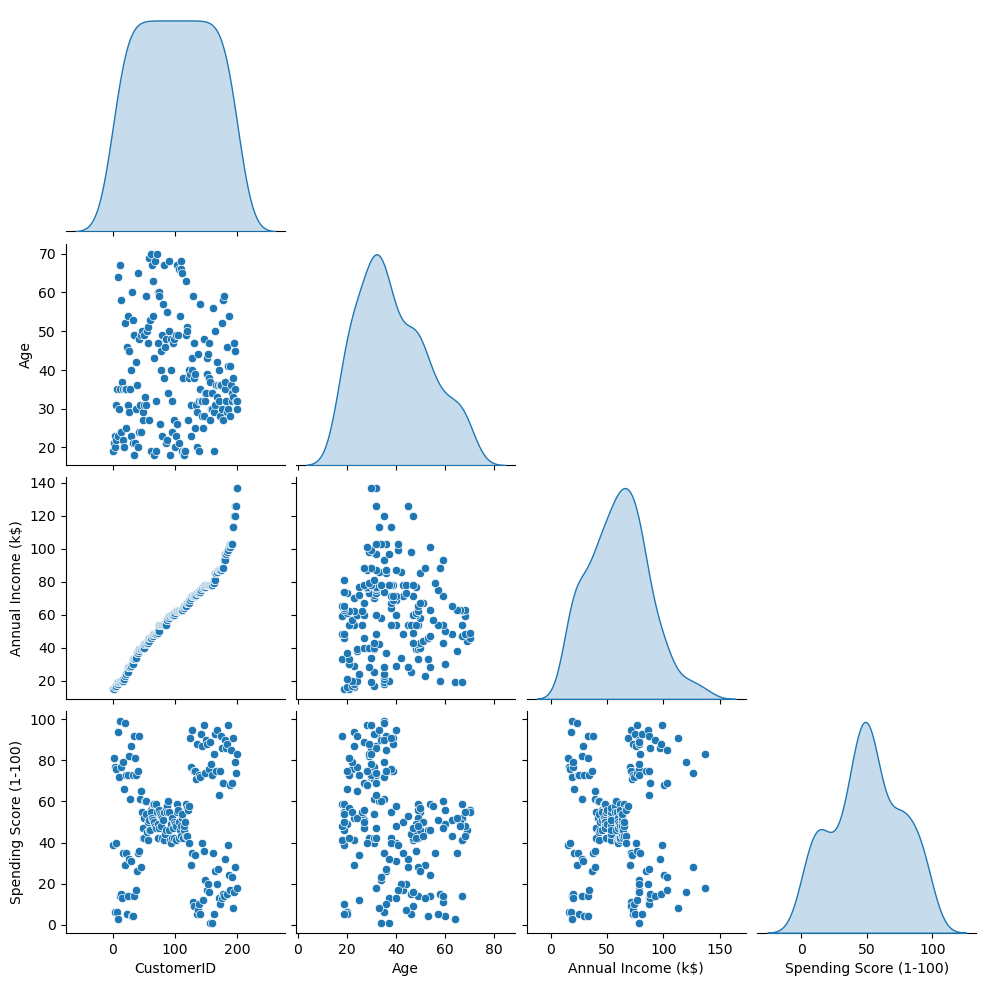

In [22]:
sns.pairplot(mall,corner=True,diag_kind="kde")
plt.show()

## Outlier Analysis

In [23]:
# Data before Outlier Treatment 
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


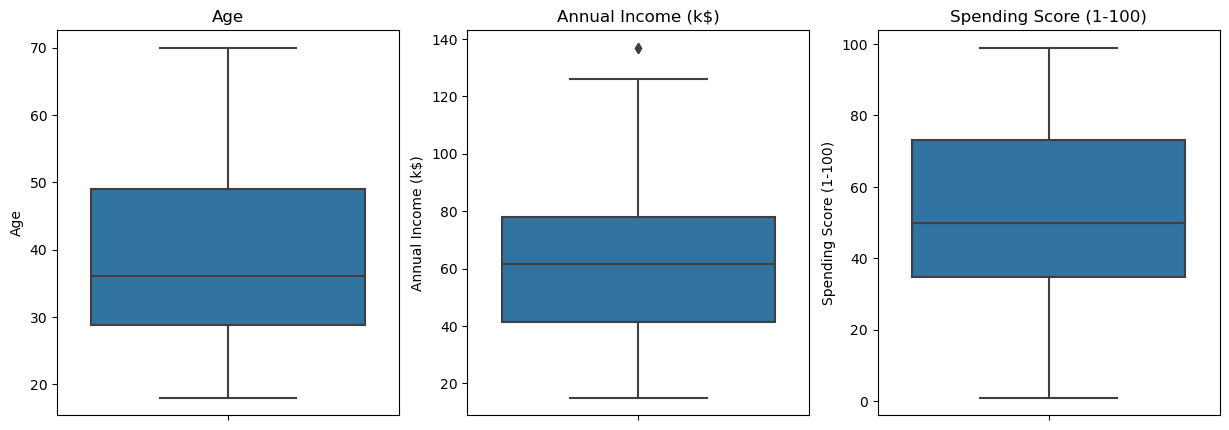

In [24]:

# Create subplots with a figure size of (15, 5)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the box plot for 'Age'
s = sns.boxplot(y=mall.Age, ax=axes[0])
axes[0].set_title('Age')

# Plot the box plot for 'Annual Income (k$)'
s = sns.boxplot(y=mall['Annual Income (k$)'], ax=axes[1])
axes[1].set_title('Annual Income (k$)')

# Plot the box plot for 'Spending Score (1-100)'
s = sns.boxplot(y=mall['Spending Score (1-100)'], ax=axes[2])
axes[2].set_title('Spending Score (1-100)')

# Show the plot
plt.show()


There is an outlier in Annual Income (k$) field but Age & Spending Score(1-100) has no outliers 

## We use Percentile Capping for outliers handling

The percentile capping technique involves setting a threshold at a specific percentile of the data distribution, typically the upper or lower tail. Any data point above or below this threshold is replaced with a predetermined value, such as the value at the threshold itself. This process effectively limits the impact of outliers on the analysis or model.

In [25]:
Q3 = mall['Annual Income (k$)'].quantile(0.99)
## This calculates the 99th percentile of the 'Annual Income (k$)' column. It means that 99% of the data points in this column have values below or equal to this percentile.
Q1 = mall['Annual Income (k$)'].quantile(0.01)
## This calculates the 1st percentile of the 'Annual Income (k$)' column. It means that only 1% of the data points in this column have values below or equal to this percentile.
mall['Annual Income (k$)'][mall['Annual Income (k$)']<=Q1]=Q1
## This caps the lower outliers by replacing any value in the 'Annual Income (k$)' column that is below or equal to the 1st percentile (Q1) with the value of Q1 itself. In other words, if a data point falls below this threshold, it is set to the value of the 1st percentile.
mall['Annual Income (k$)'][mall['Annual Income (k$)']>=Q3]=Q3
## This caps the upper outliers by replacing any value in the 'Annual Income (k$)' column that is above or equal to the 99th percentile (Q3) with the value of Q3 itself. If a data point exceeds this threshold, it is set to the value of the 99th percentile.

In [26]:
# Data After Outlier Treatment 
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.461000,50.200000
std,57.879185,13.969007,25.949731,25.823522
min,1.000000,18.000000,15.990000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,126.110000,99.000000


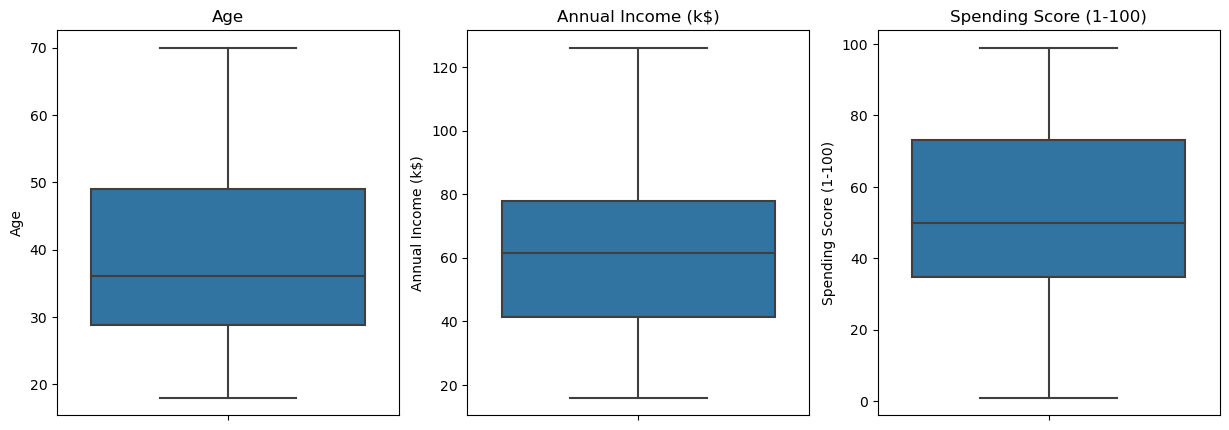

In [27]:


# Create a figure with 1 row and 3 columns, and set the figure size
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create a boxplot for the 'Age' column and assign it to the first subplot (axes[0])
s = sns.boxplot(y=mall.Age, ax=axes[0])
axes[0].set_title('Age')

# Create a boxplot for the 'Annual Income (k$)' column and assign it to the second subplot (axes[1])
s = sns.boxplot(y=mall['Annual Income (k$)'], ax=axes[1])
axes[1].set_title('Annual Income (k$)')

# Create a boxplot for the 'Spending Score (1-100)' column and assign it to the third subplot (axes[2])
s = sns.boxplot(y=mall['Spending Score (1-100)'], ax=axes[2])
axes[2].set_title('Spending Score (1-100)')

# Display the figure with all subplots
plt.show()
